In [12]:
### importing Intial libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline
pd.options.display.max_columns=100
pd.options.display.max_rows=22

os.chdir("D:\\analytixlabs\\Complete_datasets")
print os.getcwd() 
Telecom=pd.read_csv("Proactive Attrition Management-Logistic Regression Case Study.csv")
TT_Telecom.head()


Populating the interactive namespace from numpy and matplotlib
D:\analytixlabs\Complete_datasets


In [13]:
Val_Telecom=Telecom.loc[Telecom.CHURNDEP.isnull()]
TT_Telecom=Telecom.loc[Telecom.CHURNDEP.isin([0,1])]
print Val_Telecom.shape
print TT_Telecom.shape

##def missing(x):
##return sum(x.isnull())

#print "Missing values per column:"
#TT_Telecom.loc[ : ,TT_Telecom.apply(missing, axis=0)!=0]

(31047, 78)
(40000, 78)


In [14]:
#removing these 2 columns will give us the base model with any NAs['CALIBRAT' ,'CALLFWDV' ,'CALLWAIT',]
from warnings import WarningMessage,filterwarnings
#removing targrt leaks:
TT_Telecom.drop(labels=['CHURN','RETCALL','RETCALLS','RETACCPT'],inplace=True,axis=1)
#MAILORD is coliner with MAILRES,PHONES-Model,MOUREC-MOU,OWNRENT-CREDITCD,BLCKVCE	DROPBLK,

#removing Other colinear colums
TT_Telecom.drop(labels=['CSA','CALIBRAT' ,'CALLFWDV' ,'CALLWAIT','MODELS','MOUREC','CUSTOMER',
                        'BLCKVCE','DROPBLK','INCMISS','OWNRENT','OVERAGE','UNIQSUBS','AGE2','PEAKVCE','OPEAKVCE','REFURB','TRUCK'
                        ,'RV','MARRYUN','MAILORD','PCOWN','NEWCELLN','MCYCLE','REVENUE','MAILFLAG','CHANGER','OUTCALLS'],inplace=True,axis=1)
TT_Telecom.dropna(subset=['AGE1','CHANGEM'],inplace=True)
#
TT_Telecom = TT_Telecom[TT_Telecom.AGE1 != 0]
#TT_Telecom = TT_Telecom[TT_Telecom.CHANGEM != 0]

#CSA cant be identified so we we will keep them as missing
#TT_Telecom.CSA.fillna('Missing',inplace=True)


C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
xgbs=['CHANGEM','MOU','EQPDAYS','RECCHRGE','UNANSVCE','MONTHS','DROPVCE','AGE1','INCALLS', 
 'ROAM','CUSTCARE','DIRECTAS','INCOME','SETPRC','THREEWAY','PHONES','ACTVSUBS','PRIZMUB',
 'CREDITAA','MAILRES','CREDITDE','PRIZMTWN','CHILDREN','NEWCELLY','WEBCAP','CHURNDEP']
#from extraTrees classifier feature selection
ETclf=['EQPDAYS','MONTHS','CSA','RECCHRGE','CHANGEM','DROPVCE','MOU','OPEAKVCE','REVENUE', 
 'MOUREC','CHANGER','UNANSVCE','PEAKVCE','BLCKVCE','INCOME','INCALLS','DIRECTAS','OUTCALLS','AGE1','CHURNDEP']
#from Kbest
Kbest=['OCCCLER','OCCSTUD','PCOWN','CREDITGY','NEWCELLN','OCCPROF','TRUCK','MCYCLE','TRAVEL','CHANGER', 
 'MAILFLAG','CREDITZ','BLCKVCE','RV','OCCCRFT','OCCSELF','CHILDREN','MARRYYES','CSA','CHURNDEP']
ENgb=['CHANGEM','MOU','MONTHS','EQPDAYS','RECCHRGE','OVERAGE','CHANGER','CSA','DROPVCE','AGE1','INCALLS', 
'ROAM','UNIQSUBS','REVENUE','CREDITDE','DROPBLK','OPEAKVCE','RETCALLS','WEBCAP','RETCALL','REFURB','SETPRC','CHURNDEP']
ENgb8=['CHANGEM','MOU','MONTHS','EQPDAYS','RECCHRGE','OVERAGE','CHANGER','CSA','CHURNDEP']
credit=['CREDITA','CREDITAA','CREDITB','CREDITC','CREDITDE','CREDITGY', 'CREDITZ','CREDITCD','CHURNDEP']
marry=['MARRYUN','MARRYYES','MARRYNO','CHURNDEP']
occ=['OCCCLER','OCCCRFT','OCCHMKR','OCCPROF','OCCRET','OCCSELF','OCCSTUD','CHURNDEP']
vas=['DIRECTAS','THREEWAY','MOUREC','CALLFWDV','CALLWAIT','CHURNDEP']
zipco=['PRIZMRUR','PRIZMUB','PRIZMTWN','CHURNDEP']
cust=['CUSTCARE','DROPBLK','MAILRES','MAILFLAG','INCMISS','INCOME','CHURNDEP']
cdemo=['MONTHS','UNIQSUBS','PHONES','MODELS','EQPDAYS','AGE1','REFURB','WEBCAP','CREDITCD','NEWCELLY','NEWCELLN','SETPRCM','SETPRC','CHURNDEP']
last=['ACTVSUBS', 'AGE1', 'CHANGEM', 'CHANGER', 'CREDITC', 'CREDITDE', 'CSA', 'CUSTCARE', 'DROPBLK', 'DROPVCE',
 'EQPDAYS', 'INCALLS', 'MAILRES', 'MONTHS', 'MOU', 'PHONES', 'RECCHRGE', 'ROAM', 'SETPRC', 'WEBCAP','CHURNDEP']
catagorical=['CREDITA','CREDITAA','CREDITB','CREDITC','CREDITDE','CREDITGY', 'CREDITZ','CREDITCD','OCCCLER','OCCCRFT',
             'OCCHMKR','OCCPROF','OCCRET','OCCSELF','OCCSTUD','MARRYYES','MARRYNO','PRIZMRUR','PRIZMUB','PRIZMTWN','REFURB'
            ,'WEBCAP','MAILRES','CREDITCD','CHURNDEP']

sir=['OVERAGE', 'RECCHRGE', 'MOU', 'DROPBLK', 'ROAM', 'THREEWAY', 'AGE1', 'MONTHS', 'CHANGEM', 'CHILDREN', 'CREDITC', 
 'CREDITDE','PRIZMUB','REFURB', 'MAILRES', 'RETCALL', 'EQPDAYS','CHURNDEP']

In [22]:
df_TTelecom=TT_Telecom[catagorical]

df_TTelecom.shape


(38941, 25)

In [19]:
df_TTelecom.head(1)

,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,CREDITCD,OCCCLER,OCCCRFT,OCCHMKR,OCCPROF,OCCRET,OCCSELF,OCCSTUD,MARRYYES,MARRYNO,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,MAILRES,CREDITCD,CHURNDEP
31047,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0.0


In [23]:
X=df_TTelecom.ix[:,:-1]
y=df_TTelecom.CHURNDEP
#X_test=Val_Telecom.ix[:,:-1]
#y_test=Val_Telecom.CHURNDEP

from sklearn.cross_validation import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.10,random_state=0)

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
names=X_train.columns.tolist()

(35046, 24)
(3895, 24)
(35046L,)
(3895L,)


In [25]:
#names=X_train.columns.tolist()

from sklearn.preprocessing import StandardScaler
sc=StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

Optimal number of features : 14


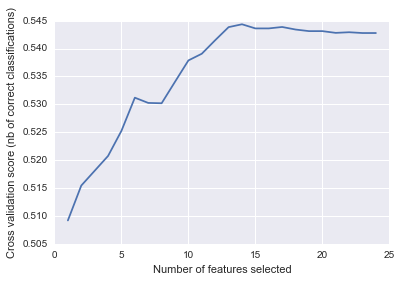

In [26]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Create the RFE object and compute a cross-validated score.
adb = AdaBoostClassifier()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=adb, step=1, cv=StratifiedKFold(y_train, 2),
scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [28]:
#print sorted(zip(map(lambda x: round(x, 4), rfecv.ranking_), names),reverse=False)

rfecv.ranking_

array([11,  9,  8,  4,  1,  2,  1,  7,  1,  6,  5,  1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  1,  1, 10])

In [34]:
def count_val(df):
    for col in df.columns:
        print df[col].value_counts()
    

count_val(TT_Telecom)

0.00       627
0.25        37
0.75        35
0.50        35
1.00        35
1.50        30
3.00        29
5.50        28
5.75        28
49.25       27
2.75        27
          ... 
1285.25      1
1409.50      1
2278.00      1
135.33       1
479.67       1
267.33       1
102.67       1
989.33       1
29.67        1
656.33       1
1386.50      1
Name: MOU, dtype: int64
44.99     4544
29.99     3510
59.99     3179
39.99     2927
10.00     2451
30.00     2248
49.99     1963
69.99     1541
50.00      996
84.99      846
32.49      673
          ... 
35.67        1
2.82         1
24.82        1
29.66        1
12.10        1
90.40        1
102.70       1
27.73        1
21.53        1
32.61        1
45.25        1
Name: RECCHRGE, dtype: int64
0.00     18946
0.25      5229
0.50      2953
0.74      2082
0.99      1551
1.24      1222
1.73       742
1.98       630
2.23       509
1.48       485
2.48       432
         ...  
7.59         1
38.86        1
46.53        1
18.81        1
4.29         1
8.

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [ ]:
X_train.head(2)

In [23]:
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Decision Tree",
 "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
 "Quadratic Discriminant Analysis"]
classifiers = [
KNeighborsClassifier(2),
DecisionTreeClassifier(max_depth=5),
RandomForestClassifier(max_depth=5, n_estimators=400, max_features=1),
AdaBoostClassifier(),
GaussianNB(),
LinearDiscriminantAnalysis(),
QuadraticDiscriminantAnalysis()]


In [26]:
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print '*'*100
    print "Classifier is " + str(name)
    print "SCORE" + str(score)




****************************************************************************************************
Classifier is Nearest Neighbors
SCORE0.531005263834
****************************************************************************************************
Classifier is Decision Tree
SCORE0.592245474387
****************************************************************************************************
Classifier is Random Forest
SCORE0.599563486969
****************************************************************************************************
Classifier is AdaBoost
SCORE0.611888560791
****************************************************************************************************
Classifier is Naive Bayes
SCORE0.538323276415
****************************************************************************************************
Classifier is Linear Discriminant Analysis
SCORE0.576710745924
**********************************************************************************************

In [77]:
y_test.value_counts()

1.0    3898
0.0    3891
Name: CHURNDEP, dtype: int64

In [68]:
TT_Telecom.columns.tolist()

['REVENUE',
 'MOU',
 'RECCHRGE',
 'DIRECTAS',
 'OVERAGE',
 'ROAM',
 'CHANGEM',
 'CHANGER',
 'DROPVCE',
 'BLCKVCE',
 'UNANSVCE',
 'CUSTCARE',
 'THREEWAY',
 'MOUREC',
 'OUTCALLS',
 'INCALLS',
 'PEAKVCE',
 'OPEAKVCE',
 'DROPBLK',
 'CALLFWDV',
 'CALLWAIT',
 'CHURN',
 'MONTHS',
 'UNIQSUBS',
 'ACTVSUBS',
 'CSA',
 'PHONES',
 'MODELS',
 'EQPDAYS',
 'CUSTOMER',
 'AGE1',
 'AGE2',
 'CHILDREN',
 'CREDITA',
 'CREDITAA',
 'CREDITB',
 'CREDITC',
 'CREDITDE',
 'CREDITGY',
 'CREDITZ',
 'PRIZMRUR',
 'PRIZMUB',
 'PRIZMTWN',
 'REFURB',
 'WEBCAP',
 'TRUCK',
 'RV',
 'OCCPROF',
 'OCCCLER',
 'OCCCRFT',
 'OCCSTUD',
 'OCCHMKR',
 'OCCRET',
 'OCCSELF',
 'OWNRENT',
 'MARRYUN',
 'MARRYYES',
 'MARRYNO',
 'MAILORD',
 'MAILRES',
 'MAILFLAG',
 'TRAVEL',
 'PCOWN',
 'CREDITCD',
 'RETCALLS',
 'RETACCPT',
 'NEWCELLY',
 'NEWCELLN',
 'REFER',
 'INCMISS',
 'INCOME',
 'MCYCLE',
 'CREDITAD',
 'SETPRCM',
 'SETPRC',
 'RETCALL',
 'CALIBRAT',
 'CHURNDEP']